# 1 Assignement

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# load Haberman's Survival.csv dataset into pandas dataframe
Haberman_df=pd.read_csv('haberman.csv',header=None,names=['age','year_of_treatment','positive_lymph_nodes','survival_status_after_5_years'])

In [6]:
# to show first 5 row data
print(Haberman_df.head())

   age  year_of_treatment  positive_lymph_nodes  survival_status_after_5_years
0   30                 64                     1                              1
1   30                 62                     3                              1
2   30                 65                     0                              1
3   31                 59                     2                              1
4   31                 65                     4                              1


In [3]:
# how many observations and features are there
print(Haberman_df.shape)

(305, 4)


In [8]:
# Data Preparation
Haberman_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age                              306 non-null int64
year_of_treatment                306 non-null int64
positive_lymph_nodes             306 non-null int64
survival_status_after_5_years    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


+ Here all datatypes are integers and need to makes one categorical datatype.
+ the last column of this dataset we choose as target column  coz it has no meaningful values.
+ In this dataset their are no missing values.

In [9]:
# how many data points for each class are present?
# how many cancer patients would survive after 5 year or not?
Haberman_df['survival_status_after_5_years'].value_counts()

1    225
2     81
Name: survival_status_after_5_years, dtype: int64

+  1 indicates that the number of survival patient after 5 years are 225
+ 2 indicates that the number of patient died within 5 years are 81

In [10]:
# modify the target column vlaues to be categorical
Haberman_df['survival_status_after_5_years']=Haberman_df['survival_status_after_5_years'].map({1:"yes",2:"no"})
Haberman_df['survival_status_after_5_years']=Haberman_df['survival_status_after_5_years'].astype('category')
print(Haberman_df.head())

   age  year_of_treatment  positive_lymph_nodes survival_status_after_5_years
0   30                 64                     1                           yes
1   30                 62                     3                           yes
2   30                 65                     0                           yes
3   31                 59                     2                           yes
4   31                 65                     4                           yes


+ Here target column converted into categorical column.
+ First putting the value 'yes' in place of 1 and 'no' in place of 2 by using map functon it basically having key:value pair like dict function..

In [12]:
print(Haberman_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age                              306 non-null int64
year_of_treatment                306 non-null int64
positive_lymph_nodes             306 non-null int64
survival_status_after_5_years    306 non-null category
dtypes: category(1), int64(3)
memory usage: 7.6 KB
None


# High Label Statistics

In [13]:
print(Haberman_df.describe())

              age  year_of_treatment  positive_lymph_nodes
count  306.000000         306.000000            306.000000
mean    52.457516          62.852941              4.026144
std     10.803452           3.249405              7.189654
min     30.000000          58.000000              0.000000
25%     44.000000          60.000000              0.000000
50%     52.000000          63.000000              1.000000
75%     60.750000          65.750000              4.000000
max     83.000000          69.000000             52.000000


+ Here in describe function include some high level statistics like mean,standard deviation,min-max values,all quartile.
+ The minimum age is 30 and maximum age is 83 with median of 52
+ In sort 25% of patients having 0 positive_lymph_nodes, 50% patients having 1 and 75% patients having 4 positive_lymph_nodes,In this the hightest nodes recorded as 52

# Histogram, PDF,CDF

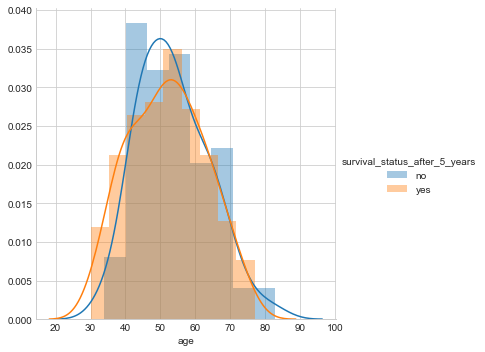

In [20]:
sns.FacetGrid(Haberman_df,hue="survival_status_after_5_years",size=5)\
.map(sns.distplot,"age")\
.add_legend();
plt.show()

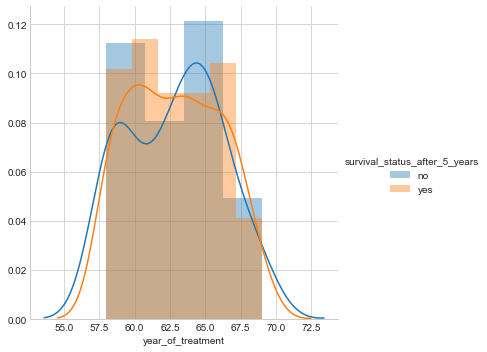

In [21]:
sns.FacetGrid(Haberman_df,hue="survival_status_after_5_years",size=5)\
.map(sns.distplot,"year_of_treatment")\
.add_legend();
plt.show()

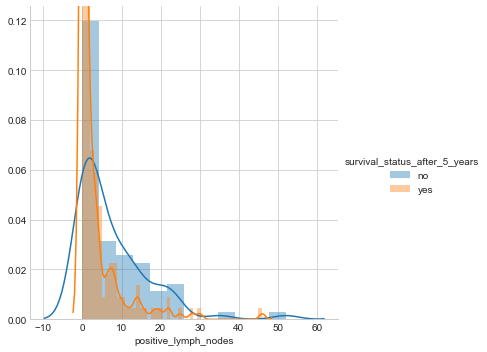

In [22]:
sns.FacetGrid(Haberman_df,hue="survival_status_after_5_years",size=5)\
.map(sns.distplot,"positive_lymph_nodes")\
.add_legend();
plt.show()

+ This plot usually indicates as Distribution plots which is use to visually assess the data points distributed with respect to frequency.
+ It is grouped into bins and the height of bars indicates each group increase in the number of data points lie within histogram.
+ Probability Density Function is the probability of variable that take a value x.
+ Kernal Density Funciton is way to estimate the PDF.
+ The bar denotes the % of the data points under the corresponding group.


In [27]:
Haberman_yes = Haberman_df.loc[Haberman_df["survival_status_after_5_years"] == "yes"];
Haberman_no = Haberman_df.loc[Haberman_df["survival_status_after_5_years"] == "no"];



******Age********
[ 0.05333333  0.10666667  0.12444444  0.09333333  0.16444444  0.16444444
  0.09333333  0.11111111  0.06222222  0.02666667]
[ 30.   34.7  39.4  44.1  48.8  53.5  58.2  62.9  67.6  72.3  77. ]


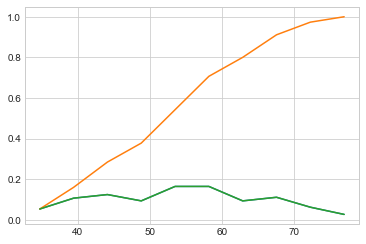

In [62]:

# The cumulative distribution function (cdf) is the probability that the variable takes a value less than or equal to x.
counts,bin_edges=np.histogram(Haberman_yes['age'],bins=10,density=True)
pdf=counts/(sum(counts))
print("******Age********")
print(pdf);
print(bin_edges);
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:],cdf)

count,bin_edges=np.histogram(Haberman_yes['age'],bins=10,density=True)
pdf=counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);
plt.show()

******year_of_treatment********
[ 0.18666667  0.10666667  0.10222222  0.07111111  0.09777778  0.10222222
  0.06666667  0.09777778  0.09333333  0.07555556]
[ 58.   59.1  60.2  61.3  62.4  63.5  64.6  65.7  66.8  67.9  69. ]


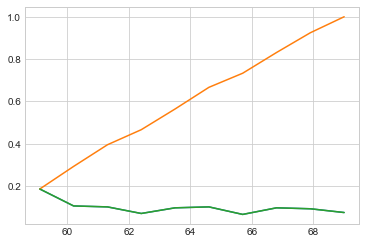

In [54]:
counts,bin_edges=np.histogram(Haberman_yes['year_of_treatment'],bins=10,density=True)
pdf=counts/(sum(counts))
print("******year_of_treatment********")
print(pdf);
print(bin_edges);
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:],cdf)

count,bin_edges=np.histogram(Haberman_yes['year_of_treatment'],bins=10,density=True)
pdf=counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);
plt.show()

******positive_lymph_nodes********
[ 0.83555556  0.08        0.02222222  0.02666667  0.01777778  0.00444444
  0.00888889  0.          0.          0.00444444]
[  0.    4.6   9.2  13.8  18.4  23.   27.6  32.2  36.8  41.4  46. ]


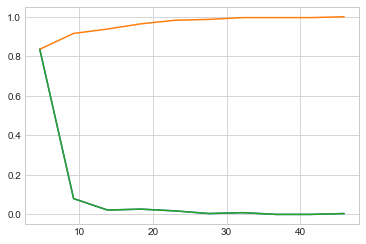

In [55]:
counts,bin_edges=np.histogram(Haberman_yes['positive_lymph_nodes'],bins=10,density=True)
pdf=counts/(sum(counts))
print("******positive_lymph_nodes********")
print(pdf);
print(bin_edges);
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:],cdf)

count,bin_edges=np.histogram(Haberman_yes['positive_lymph_nodes'],bins=10,density=True)
pdf=counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);
plt.show()

In [64]:
 plt.figure(figsize=(20,5))
for idx, feature in enumerate(list(Haberman_df.columns)[:-1]):
    plt.subplot(1, 3, idx+1)
    print("********* "+feature+" *********")
    counts, bin_edges = np.histogram(Haberman_df[feature], bins=10, density=True)
    print("Bin Edges: {}".format(bin_edges))
    pdf = counts/sum(counts)
    print("PDF: {}".format(pdf))
    cdf = np.cumsum(pdf)
    print("CDF: {}".format(cdf))
    plt.plot(bin_edges[1:], pdf, bin_edges[1:], cdf)
    plt.xlabel(feature)

********* age *********
Bin Edges: [ 30.   35.3  40.6  45.9  51.2  56.5  61.8  67.1  72.4  77.7  83. ]
PDF: [ 0.05228758  0.08823529  0.1503268   0.17320261  0.17973856  0.13398693
  0.13398693  0.05882353  0.02287582  0.00653595]
CDF: [ 0.05228758  0.14052288  0.29084967  0.46405229  0.64379085  0.77777778
  0.91176471  0.97058824  0.99346405  1.        ]
********* year_of_treatment *********
Bin Edges: [ 58.   59.1  60.2  61.3  62.4  63.5  64.6  65.7  66.8  67.9  69. ]
PDF: [ 0.20588235  0.09150327  0.08496732  0.0751634   0.09803922  0.10130719
  0.09150327  0.09150327  0.08169935  0.07843137]
CDF: [ 0.20588235  0.29738562  0.38235294  0.45751634  0.55555556  0.65686275
  0.74836601  0.83986928  0.92156863  1.        ]
********* positive_lymph_nodes *********
Bin Edges: [  0.    5.2  10.4  15.6  20.8  26.   31.2  36.4  41.6  46.8  52. ]
PDF: [ 0.77124183  0.09803922  0.05882353  0.02614379  0.02941176  0.00653595
  0.00326797  0.          0.00326797  0.00326797]
CDF: [ 0.77124183  0

# Box plot and Whiskers

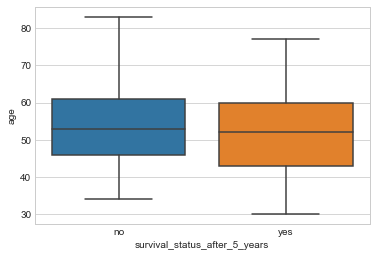

In [71]:
# Box plot with whisker another method of visualizing the scatter plot more intuitively.
# In box plot their are median,percentile,quantile.
# In this technique inter-quartile range used in whiskers.
# This whiskers do not use as min and max values.

sns.boxplot(x='survival_status_after_5_years',y='age',data=Haberman_df)
plt.show()

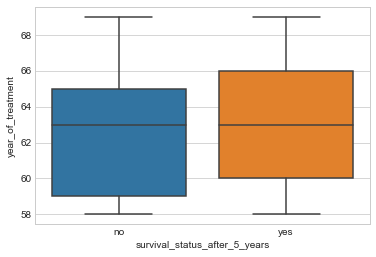

In [72]:
sns.boxplot(x='survival_status_after_5_years',y='year_of_treatment',data=Haberman_df)
plt.show()

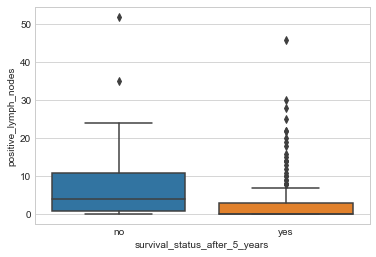

In [74]:
sns.boxplot(x='survival_status_after_5_years',y='positive_lymph_nodes',data=Haberman_df)
plt.show()

# Violin plot

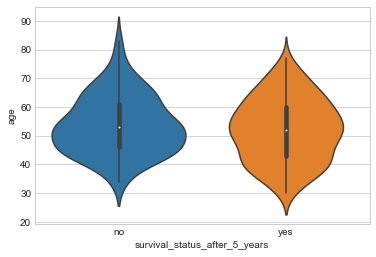

In [75]:
# It merge the two plot and simplifies them
sns.violinplot(x='survival_status_after_5_years',y='age',data=Haberman_df,size=8)
plt.show()

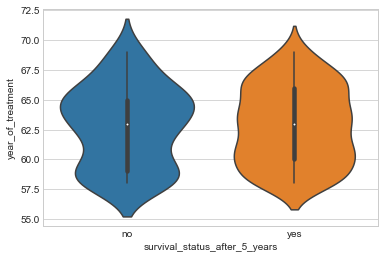

In [77]:
sns.violinplot(x='survival_status_after_5_years',y='year_of_treatment',data=Haberman_df,size=8)
plt.show()

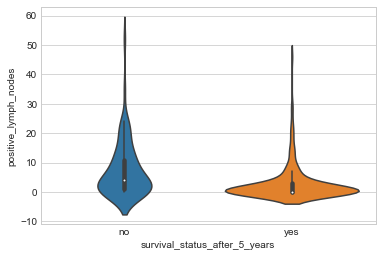

In [79]:
sns.violinplot(x='survival_status_after_5_years',y='positive_lymph_nodes',data=Haberman_df,size=8)
plt.show()

+ In last violin plot their positive_lymph_nodes of survival is highly densed as 0 to 5
+ There are maximum number of patients have less than 5 positive_lymph_nodes
+ Their are higher chance to survival in those patients treated after 1966.
+ less chance to survival of patients treated before 1959.

# Pairplot

It belongs to seaborn library in this scatter plot between after two data columns in a dataframe.
It simply indicates the  relationship between variable


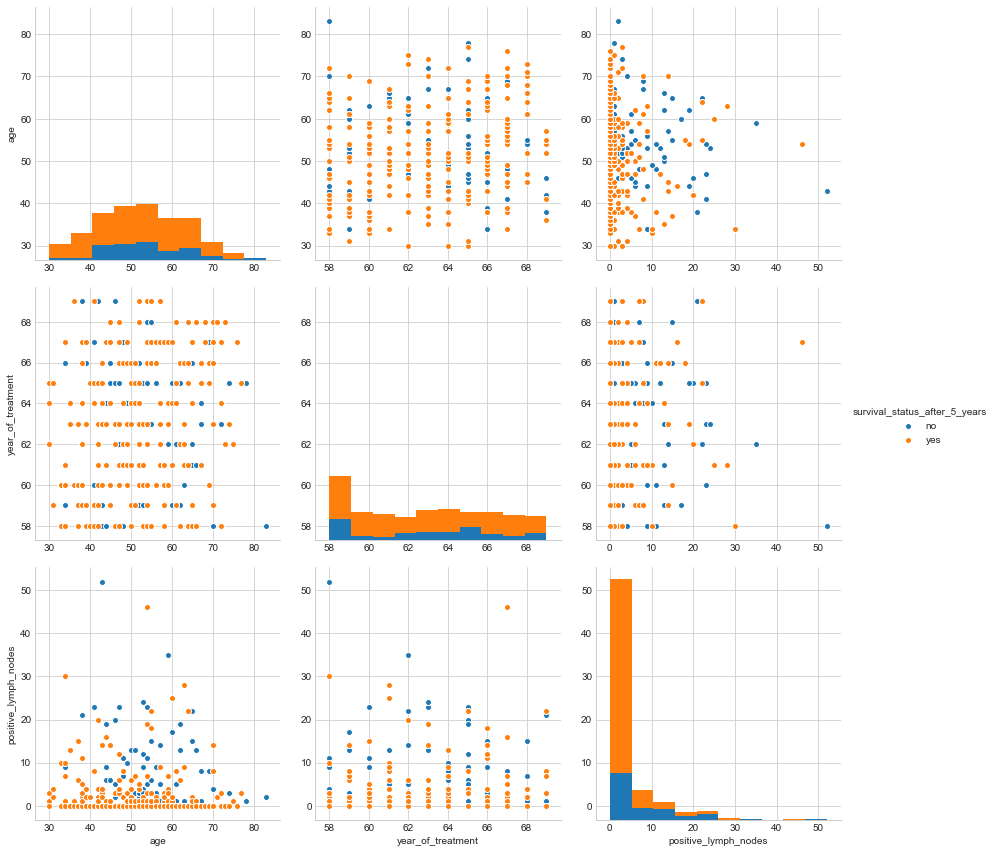

In [80]:
sns.pairplot(Haberman_df,hue='survival_status_after_5_years',size=4)
plt.show()

+ Here in pairplot year_of_treatment and positive_lymph_nodes having better seperation than other class

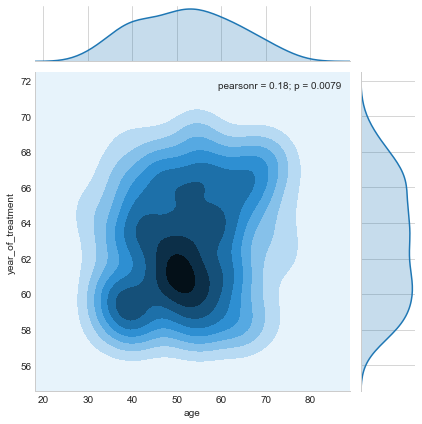

In [81]:
sns.jointplot(x='age',y='year_of_treatment',data=Haberman_yes,kind='kde');
plt.show()